Exploratory analysis with Julia

From: https://github.com/mohdsanadzakirizvi/Data-Science-with-Julia

Data

In [5]:
using DataFrames

Understanding data frames in julia

https://dataframes.juliadata.org/stable/man/basics/#First-Steps-with-DataFrames.jl

In [7]:
using CSV

In [8]:
train = CSV.read("data/train.csv", DataFrame)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome
,String15,String7?,String3?,String3?,String15,String3?,Int64
1,LP001002,Male,No,0,Graduate,No,5849
2,LP001003,Male,Yes,1,Graduate,No,4583
3,LP001005,Male,Yes,0,Graduate,Yes,3000
4,LP001006,Male,Yes,0,Not Graduate,No,2583
5,LP001008,Male,No,0,Graduate,No,6000
6,LP001011,Male,Yes,2,Graduate,Yes,5417
7,LP001013,Male,Yes,0,Not Graduate,No,2333
8,LP001014,Male,Yes,3+,Graduate,No,3036
9,LP001018,Male,Yes,2,Graduate,No,4006


In [9]:
size(train)

(614, 13)

In [10]:
names(train)

13-element Vector{String}:
 "Loan_ID"
 "Gender"
 "Married"
 "Dependents"
 "Education"
 "Self_Employed"
 "ApplicantIncome"
 "CoapplicantIncome"
 "LoanAmount"
 "Loan_Amount_Term"
 "Credit_History"
 "Property_Area"
 "Loan_Status"

In [19]:
describe(train)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Loan_ID,,LP001002,,LP002990,0,String15
2,Gender,,Female,,Male,13,"Union{Missing, String7}"
3,Married,,No,,Yes,3,"Union{Missing, String3}"
4,Dependents,,0,,3+,15,"Union{Missing, String3}"
5,Education,,Graduate,,Not Graduate,0,String15
6,Self_Employed,,No,,Yes,32,"Union{Missing, String3}"
7,ApplicantIncome,5403.46,150,3812.5,81000,0,Int64
8,CoapplicantIncome,1621.25,0.0,1188.5,41667.0,0,Float64
9,LoanAmount,146.412,9,128.0,700,22,"Union{Missing, Int64}"


In [19]:
describe(train, :all, cols=:LoanAmount)

,variable,mean,std,min,q25,median,q75,max,nunique
,Symbol,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Nothing
1,LoanAmount,146.412,85.5873,9,100.0,128.0,168.0,700,


Plotting

Plotting can be done with packages {Plots} and {StatPlots}

{Plots}: It is a high-level plotting package that interfaces other plotting packages called ‘back-ends‘. They behave like the graphics engines that generate the graphics. It has a simple and consistent interface.

{StatPlots}: It is a supporting package used with {Plots} package consisting of statistical recipes for various concepts and types.

In [17]:
typeof(train)

DataFrame

In [22]:
pwd()

"/Users/jameselsner/Desktop/ClassNotes/QG-2022/Jupyter_Notebooks"

In [23]:
Iris = CSV.read("data/iris.csv", DataFrame)

,sepal_length,sepal_width,petal_length,petal_width,species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [24]:
using Plots

In [30]:
typeof(Iris)

DataFrame

In [31]:
Iris.sepal_length

150-element Vector{Float64}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4
 4.6
 5.0
 4.4
 4.9
 5.4
 4.8
 4.8
 ⋮
 6.0
 6.9
 6.7
 6.9
 5.8
 6.8
 6.7
 6.7
 6.3
 6.5
 6.2
 5.9

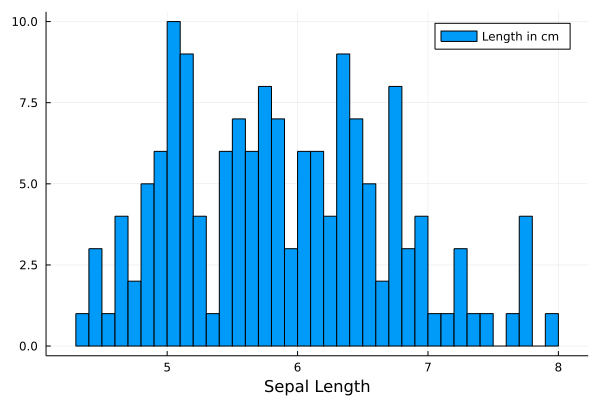

In [32]:
Plots.histogram(Iris.sepal_length, 
                bins = 50, xlabel = "Sepal Length", 
                            labels = "Length in cm")